# Loading necassry libarry

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

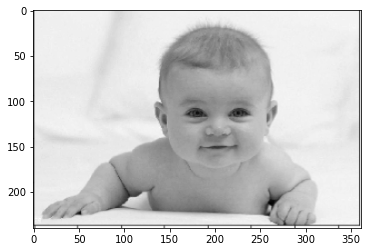

In [4]:
#load the test file
test_image = cv2.imread('C:\\Users\\jaspreet singh\\pythonProject\\Face detection System\\data\\baby1.jpg')

# convert image into gray code
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# plot the image
plt.imshow(test_image_gray,cmap = 'gray')

# Convert BGR format image into RBG

In [52]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Loading the classifier for frontal face

In [53]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Face detection
### We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h).

In [54]:
faces_rects = face_cascade.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


#### Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a green rectangle with thicknessof 2

In [55]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

## Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

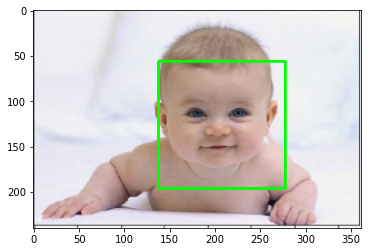

In [56]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

## generalised function on face detection 

In [84]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 1)
        
    return image_copy

## Testing the Model on new image

In [85]:
#loading image
test_image2 = cv2.imread('C:\\Users\\jaspreet singh\\pythonProject\\Face detection System\\data\\baby2.jpg')

#call the function to detect faces
faces = detect_faces(face_cascade, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

In [86]:
#loading image
test_image2 = cv2.imread('C:\\Users\\jaspreet singh\\pythonProject\\Face detection System\\data\\group.jpg')

#call the function to detect faces
faces = detect_faces(face_cascade, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

In [87]:
cv2.imwrite('image1.png',faces)

True